In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from specialist_data import *
from graph_utils import *
from models.stats.context_stats import ContextStats

Evolution EDA

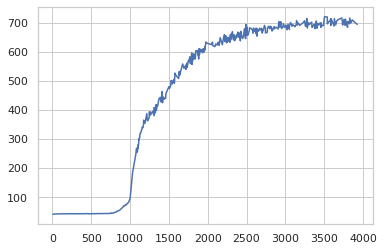

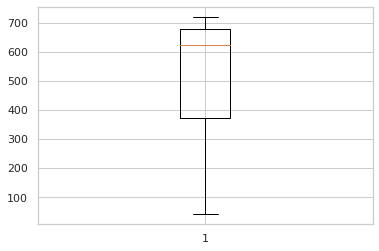

In [10]:
stats = ContextStats('../../data/xdpole', [10])

s = stats.get_seed(10)
s.fitness_evolution()

plt.boxplot(s.run_data.avgfit)
plt.show()

Initial Condition EDA

X Boxplots


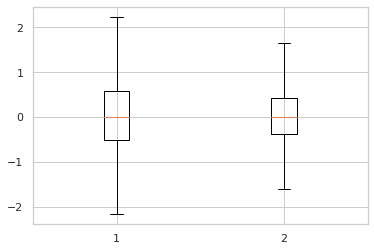

A Boxplots


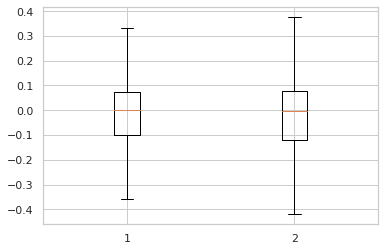

B Boxplots


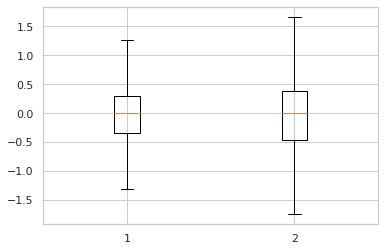

In [21]:
ic_df = transformed.data

print('X Boxplots')
plt.boxplot([ic_df.x1, ic_df.x2], showfliers=False)
plt.show()

print('A Boxplots')
plt.boxplot([ic_df.a1, ic_df.b1], showfliers=False)
plt.show()

print('B Boxplots')
plt.boxplot([ic_df.a2, ic_df.b2], showfliers=False)
plt.show()

Conditions Distribution

x1 Dist


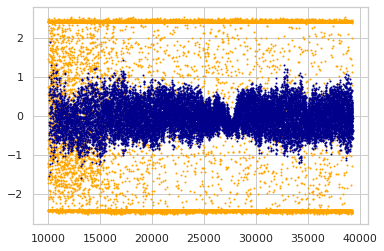

x2 Dist


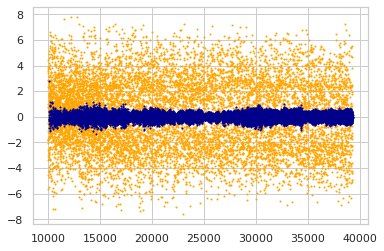

a1 Dist


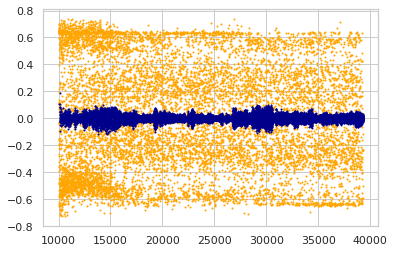

a2 Dist


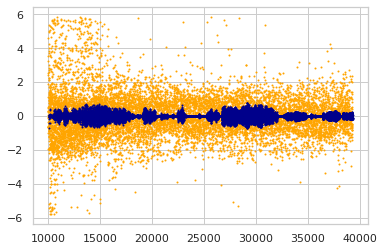

b1 Dist


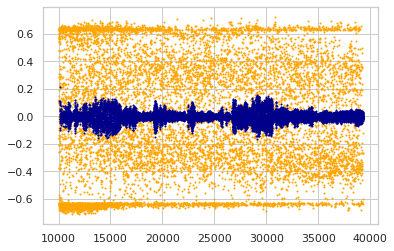

b2 Dist


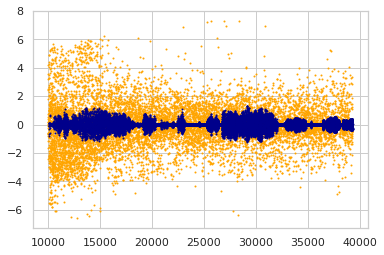

In [45]:
last_gens = ic_df.query('index > 10000')

ic_good = last_gens.query('performance == 1000')
ic_bad = last_gens.query('performance < 100')

def dist(col):
    print(col + ' Dist')
    plt.scatter(ic_bad.index, ic_bad[col], s=1, color='orange')
    plt.scatter(ic_good.index, ic_good[col], s=1, color='darkblue')
    plt.show()

print('Last Generations')


dist('x1')
dist('x2')
dist('a1')
dist('a2')
dist('b1')
dist('b2')

First Generations
x1 Dist


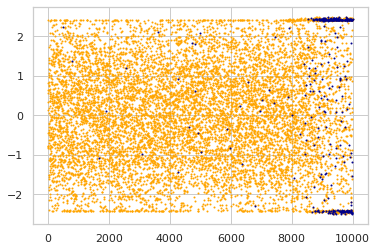

x2 Dist


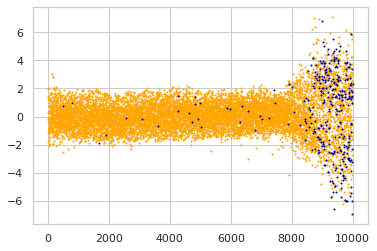

a1 Dist


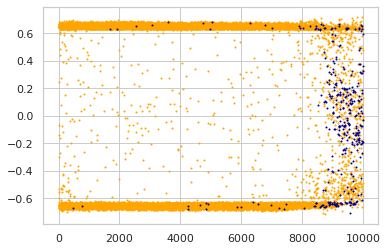

a2 Dist


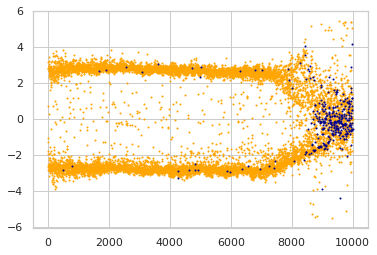

b1 Dist


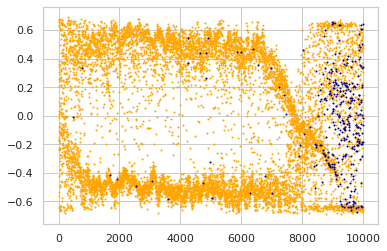

b2 Dist


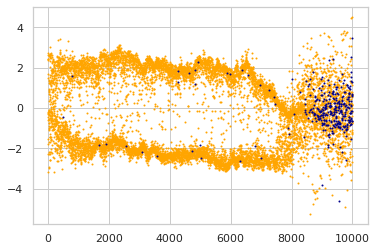

In [47]:
first_gens = ic_df.query('index < 10000')

ic_good = first_gens.query('performance > 100')
ic_bad = first_gens.query('performance < 100')

print('First Generations')

dist('x1')
dist('x2')
dist('a1')
dist('a2')
dist('b1')
dist('b2')